<a href="https://colab.research.google.com/github/oumaimakl/MNIST/blob/main/mnistML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras.datasets import mnist # import the function mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout # Dense = Fully Connected layer.
from tensorflow.keras.optimizers import RMSprop, Adam
import matplotlib.pyplot as plt # shorcut for a plot function

#sssss

In [ ]:
batch_size = 128
num_classes = 10
epochs = 100

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
[5 0 4 1 9 2 1 3 1 4]


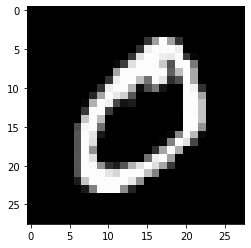

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train[:10])
plt.imshow(x_train[1,:,:],   cmap = 'gray')                      

In [ ]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape (10000, 784)
x_train =x_train.astype('float32') 
x_test =x_test.astype('float32') 
x_train /= 255
x_test /= 255
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


60000 train samples
10000 test samples


In [ ]:
y_train =keras.utils.to_categorical(y_train, num_classes )
y_test =keras.utils.to_categorical(y_test, num_classes )
print(y_train[1,:])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
from inspect import modulesbyfile
model = Sequential()

model.add(Dense(200, activation="relu",input_shape=(784,)))


model.add(Dropout(0.4))

model.add(Dense(260, activation="relu"))
model. add(Dropout(0.4))

model.add(Dense(10, activation="softmax"))
## Play with different number of layers and see overfitting. Then, ad

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               157000    
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 260)               52260     
                                                                 
 dropout_1 (Dropout)         (None, 260)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2610      
                                                                 
Total params: 211,870
Trainable params: 211,870
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(loss="categorical_crossentropy",
optimizer=Adam(), metrics=["accuracy"])


In [ ]:
history = model2.fit(x_train, y_train,
batch_size=batch_size,
epochs=epochs,
verbose= 1, # means print everything
validation_data=(x_test, y_test)) # it runs the model here


Epoch 1/100
469/469 [==============================] - 165s 349ms/step - loss: 0.2615 - accuracy: 0.9182 - val_loss: 0.0534 - val_accuracy: 0.9829
Epoch 2/100
469/469 [==============================] - 165s 351ms/step - loss: 0.0785 - accuracy: 0.9771 - val_loss: 0.0354 - val_accuracy: 0.9892
Epoch 3/100
469/469 [==============================] - 167s 357ms/step - loss: 0.0590 - accuracy: 0.9829 - val_loss: 0.0340 - val_accuracy: 0.9897
Epoch 4/100
469/469 [==============================] - 168s 358ms/step - loss: 0.0465 - accuracy: 0.9863 - val_loss: 0.0304 - val_accuracy: 0.9904
Epoch 5/100
469/469 [==============================] - 167s 357ms/step - loss: 0.0387 - accuracy: 0.9885 - val_loss: 0.0369 - val_accuracy: 0.9891
Epoch 6/100
469/469 [==============================] - 171s 365ms/step - loss: 0.0355 - accuracy: 0.9894 - val_loss: 0.0303 - val_accuracy: 0.9906
Epoch 7/100
469/469 [==============================] - 170s 362ms/step - loss: 0.0277 - accuracy: 0.9916 - val_loss: 0

In [ ]:
score = model.evaluate(x_test, y_test, verbose=1,batch_size=batch_size)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


79/79 [==============================] - 0s 3ms/step - loss: 0.0826 - accuracy: 0.9819
Test loss: 0.08258508890867233
Test accuracy: 0.9818999767303467


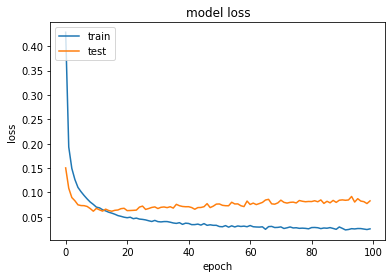

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D, MaxPooling2D
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
input_shape=(28,28,1)

In [ ]:
model2 = Sequential() #couche apres couche
model2.add(Conv2D(32, kernel_size=(3, 3),
activation="relu",input_shape=input_shape))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add (Dropout (0.25))
model2.add(Flatten()) 
model2.add(Dense(200, activation='relu', input_shape=(784,))) 

model2.add(Dropout(0.4)) 

model2.add(Dense(200, activation="relu")) 
model2.add(Dropout (0.4))

model2.add(Dense(10, activation='softmax'))

model2. summary ()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense_3 (Dense)             (None, 200)               1843400   
                                                      